# Introduction

For this project, we seek to analyse funding received by startups in India. The aim is to prescribe the best course of action for a startup looking into the Indian business ecosystem. Our first step will be to gain business understanding of the problem.

# Business Understanding

India has become an attractive location for investors and has seen a number of successful startups achieve the coveted "unicorn" status. To guide our quest for the best course of action as an upcoming startup, we asked a few questions which we will attempt to answer using the data on hand.

### Questions

- Does the age of the  startup affect the funding received?
- Which sectors received the most funding?
- Can location affect the success of receiving funding from investors?
- At what stage do startups receive the most funding?
- What is the average amount received each year per stage?

### Hypothesis 

##### NULL: Technological industries do not have a higher success rate of being funded 

##### ALTERNATE: Technological industries have a higher success rate of being funded

## Setup

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import numpy as np 
import pandas as pd 

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")



import plotly.express as px

# EDA (pandas-profiling, etc. )

from scipy import stats

from scipy.stats import pearsonr

from scipy.stats import chi2_contingency



# Data Loading
Here is the section to load the datasets and the additional files

#### Load 2018 Data  

In [2]:
# For CSV, use pandas.read_csv

#import the 2018 dataset 
#select specific columns 
startup_funding_2018 = pd.read_csv('startup_funding2018.csv', 
                                   usecols = ['Company Name','Industry','Round/Series','Amount','Location'])

# rename the columns for consistency 

#industry --> sector 
#Round/Series --> stage 
startup_funding_2018.rename(columns = {'Industry':'Sector'}, inplace = True)

startup_funding_2018.rename(columns = {'Round/Series':'Stage'}, inplace = True)

# Add the funding year as a column 

startup_funding_2018['Funding Year'] = "2018"

#Change the funding year to integer type 

startup_funding_2018['Funding Year'] = startup_funding_2018['Funding Year'].astype(int)

#### 2018 Data Exploration & Cleaning

In [3]:
#check shape of dataset
startup_funding_2018.shape

(526, 6)

In [4]:
#inspect dataset
startup_funding_2018.head()

,Company Name,Sector,Stage,Amount,Location,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",2018


In [5]:
#check for null values
startup_funding_2018.isna().any()

Company Name    False
Sector          False
Stage           False
Amount          False
Location        False
Funding Year    False
dtype: bool

In [6]:
#Strip the location data to only the city-area. 
startup_funding_2018['Location'] = startup_funding_2018.Location.str.split(',').str[0]
startup_funding_2018['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [7]:
#get index of rows where 'Amount' column is in rupees, this will be used when changing the digits to dollars
get_index = startup_funding_2018.index[startup_funding_2018['Amount'].str.contains('₹')]

In [8]:
#Check the summary information about the 2018 dataset 
startup_funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  526 non-null    object
 1   Sector        526 non-null    object
 2   Stage         526 non-null    object
 3   Amount        526 non-null    object
 4   Location      526 non-null    object
 5   Funding Year  526 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 24.8+ KB


In [9]:
#To convert the data type in a column to a numerical one, there is the need to remove some symbols including commas and currency

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2018['Amount'] = startup_funding_2018['Amount'].apply(lambda x:str(x).replace('—', '0'))

startup_funding_2018['Amount'] = startup_funding_2018['Amount'].replace('—', np.nan)


In [10]:
#converting the Amount values to numeric type, any value which cannot be converted will be changed to NaN

startup_funding_2018['Amount'] = pd.to_numeric(startup_funding_2018['Amount'], errors='coerce')

In [11]:
#Check the final dataset information. 
startup_funding_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  526 non-null    object 
 1   Sector        526 non-null    object 
 2   Stage         526 non-null    object 
 3   Amount        378 non-null    float64
 4   Location      526 non-null    object 
 5   Funding Year  526 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ KB


In [12]:
#Convert the rows with rupees to dollars
#Multiply the rupees values in the amount column by the conversion rate 

dollarToRupeeConversionRate = 0.012
startup_funding_2018.loc[get_index,['Amount']]=startup_funding_2018.loc[get_index,['Amount']].values*dollarToRupeeConversionRate

startup_funding_2018.loc[:,['Amount']].head()


,Amount
0,250000.0
1,480000.0
2,780000.0
3,2000000.0
4,NaN


In [13]:
#print the first 50 rows of the dataset 
startup_funding_2018.head(50)

,Company Name,Sector,Stage,Amount,Location,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,Mumbai,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,Gurgaon,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,2018
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000.0,Bengaluru,2018
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,192000.0,Kalkaji,2018
7,Hyperdata.IO,Market Research,Angel,600000.0,Hyderabad,2018
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,Mumbai,2018
9,Microchip Payments,Mobile Payments,Seed,NaN,Bangalore,2018


In [14]:
startup_funding_2018.loc[(178)]

Company Name                                       BuyForexOnline
Sector                                                     Travel
Stage           https://docs.google.com/spreadsheets/d/1x9ziNe...
Amount                                                  2000000.0
Location                                                Bangalore
Funding Year                                                 2018
Name: 178, dtype: object

In [15]:
startup_funding_2018.loc[178, ['Stage']] = ['']

startup_funding_2018['Stage'] = startup_funding_2018['Stage'].apply(lambda x:str(x).replace('Undisclosed', ''))

startup_funding_2018.loc[(178)]


Company Name    BuyForexOnline
Sector                  Travel
Stage                         
Amount               2000000.0
Location             Bangalore
Funding Year              2018
Name: 178, dtype: object

In [16]:
#find duplicates 
duplicate = startup_funding_2018[startup_funding_2018.duplicated()]

duplicate

,Company Name,Sector,Stage,Amount,Location,Funding Year
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,2018


In [17]:
#drop duplicates 

startup_funding_2018 = startup_funding_2018.drop_duplicates(keep='first')


#### Load 2019 Data  

In [18]:
#import the 2019 dataset 
#select specific columns 
 
startup_funding_2019 = pd.read_csv('startup_funding2019.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 

#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2019.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2019.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2019.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 

startup_funding_2019['Funding Year'] = "2019"

#Change the funding year to integer type

startup_funding_2019['Funding Year'] = startup_funding_2019['Funding Year'].astype(int)

### 2019 Data Exploration &  Cleaning

In [19]:
#check the shape of the dataset 
startup_funding_2019.shape

(89, 8)

In [20]:
#check the first 5 records of the dataset 
startup_funding_2019.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [21]:
#check the summarized information on the 2019 dataset 
startup_funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        89 non-null     object 
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 5.7+ KB


In [22]:
#check on the location information 
startup_funding_2019['Location'].head()

0          NaN
1       Mumbai
2       Mumbai
3      Chennai
4    Telangana
Name: Location, dtype: object

In [23]:
startup_funding_2019.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [24]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('—', '0'))
startup_funding_2019['Amount'] = startup_funding_2019['Amount'].replace('—', np.nan)


In [25]:
#Some rows-values in the amount column are undisclosed 
# Extract the rows with undisclosed funding information 

index_new = startup_funding_2019.index[startup_funding_2019['Amount']=='Undisclosed']
#Print the number of rows with such undisclosed values
print('The number of values with undisclosed amount is ', len(index_new))

The number of values with undisclosed amount is  12


In [26]:
#explore these records 
startup_funding_2019.loc[(index_new)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
5,FlytBase,NaN,Pune,Technology,Undisclosed,Undisclosed,NaN,2019
6,Finly,NaN,Bangalore,SaaS,"Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,Venture Catalysts,Undisclosed,NaN,2019
14,Open Secret,NaN,NaN,Food tech,Matrix Partners,Undisclosed,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,"Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,Inflection Point Ventures,Undisclosed,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,Dinesh Dua,Undisclosed,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Fintech innovation lab,Undisclosed,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,"Walmart, Flipkart",Undisclosed,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,Sunil Gavaskar,Undisclosed,NaN,2019


In [27]:
#Since undisclosed amounts does not provide any intelligence, 
#we decided to drop rows with such characteristics 
# Replace the undisclosed amounts with an empty string 

#startup_funding_2019 = startup_funding_2019.drop(labels=index_new, axis=0)
#startup_funding_2019['Amount'] = startup_funding_2019['Amount'].apply(lambda x:str(x).replace('Undisclosed', ''))

startup_funding_2019['Amount'] = startup_funding_2019['Amount'].replace('Undisclosed', np.nan)

In [28]:
startup_funding_2019.loc[(index_new)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
5,FlytBase,NaN,Pune,Technology,Undisclosed,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,"Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,Venture Catalysts,NaN,NaN,2019
14,Open Secret,NaN,NaN,Food tech,Matrix Partners,NaN,NaN,2019
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Health,"Kunal Bahl, Rohit Bansal.",NaN,Pre series A,2019
23,DROR Labs Pvt. Ltd,2018.0,Delhi,Safety tech,Inflection Point Ventures,NaN,NaN,2019
32,Pumpkart,2014.0,Chandigarh,E-marketplace,Dinesh Dua,NaN,NaN,2019
45,Afinoz,NaN,Noida,Fintech,Fintech innovation lab,NaN,NaN,2019
54,Ninjacart,2015.0,NaN,B2B Supply Chain,"Walmart, Flipkart",NaN,NaN,2019
55,Binca Games,2014.0,Mumbai,Games,Sunil Gavaskar,NaN,NaN,2019


In [29]:
#Convert the Amount column to float 
#startup_funding_2019['Amount'] = startup_funding_2019.Amount.apply(lambda x:float(x))
startup_funding_2019['Amount'] = pd.to_numeric(startup_funding_2019['Amount'], errors='coerce')

In [30]:
#Check the first 5 rows of the dataset 
startup_funding_2019.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,General Atlantic,150000000.0,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019


In [31]:
##Check the summary information of the dataset 

startup_funding_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  89 non-null     object 
 1   Founded       60 non-null     float64
 2   Location      70 non-null     object 
 3   Sector        84 non-null     object 
 4   Investor      89 non-null     object 
 5   Amount        77 non-null     float64
 6   Stage         43 non-null     object 
 7   Funding Year  89 non-null     int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 5.7+ KB


In [32]:
#Check if there are any NULL VALUES 
startup_funding_2019.isna().any()

Company Name    False
Founded          True
Location         True
Sector           True
Investor        False
Amount           True
Stage            True
Funding Year    False
dtype: bool

In [33]:
#Check if there are any NULL VALUES 
startup_funding_2019.isna().any().sum()

5

Although there are some NULL values in 2019 dataset, we plan to analyze it at a later point 

In [34]:
#find duplicates 

duplicate = startup_funding_2019[startup_funding_2019.duplicated()]

duplicate



,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year


There are no duplicates 

##### Load 2020 data 

In [35]:
#import the 2020 dataset 
#select specific columns 

startup_funding_2020 = pd.read_csv('startup_funding2020.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 

#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2020.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2020.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2020.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 


startup_funding_2020['Funding Year'] = "2020"

#Change the funding year to integer type

startup_funding_2020['Funding Year'] = startup_funding_2020['Funding Year'].astype(int)


In [36]:
#Check the first 5 rows of the 2020 funding data
startup_funding_2020.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,"$200,000",NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,"$100,000",Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,Undisclosed,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital","$400,000",NaN,2020
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge","$340,000",NaN,2020


In [37]:
#Summary information the dataset 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  1055 non-null   object
 1   Founded       843 non-null    object
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   Investor      1017 non-null   object
 5   Amount        1052 non-null   object
 6   Stage         591 non-null    object
 7   Funding Year  1055 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 66.1+ KB


As can be seen the year Founded and Amount attributes will need conversion to numeric data. 

In [38]:
#To convert the funding attribute to numeric data, we had to corece the conversion
#This is due to some missing data values which were causing errors 

startup_funding_2020['Founded'] = pd.to_numeric(startup_funding_2020['Founded'], errors='coerce').convert_dtypes(int)

In [39]:
# check for NA's 
startup_funding_2020.isna().sum()

Company Name      0
Founded         213
Location         94
Sector           13
Investor         38
Amount            3
Stage           464
Funding Year      0
dtype: int64

In [40]:
#To convert the column to a numerical one, there the need to remove some symbols including commas and currency

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2020['Amount'] = startup_funding_2020['Amount'].apply(lambda x:str(x).replace('—', '0'))
startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('—', np.nan)

In [41]:
#Find the number of rows with undisclosed amounts 
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undisclosed']
print('The total number of undisclosed records is', len(index1))

The total number of undisclosed records is 243


In [42]:
#Since undisclosed amounts does not provide any intelligence, 
#we decided to replace with empty NAN

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undisclosed', np.nan)

In [43]:
#print a summary information on the 2020 data 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  1055 non-null   object
 1   Founded       842 non-null    Int64 
 2   Location      961 non-null    object
 3   Sector        1042 non-null   object
 4   Investor      1017 non-null   object
 5   Amount        812 non-null    object
 6   Stage         591 non-null    object
 7   Funding Year  1055 non-null   int64 
dtypes: Int64(1), int64(1), object(6)
memory usage: 67.1+ KB


The amount attribute needs to be changed to a numeric datatype 

In [44]:
#Find the row with 887000 23000000 in the amount section
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='887000 23000000']
index1

Index([465], dtype='int64')

In [45]:
#print the row record
startup_funding_2020.loc[(index1)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
465,True Balance,2014,Gurugram,Finance,Balancehero,887000 23000000,Series C,2020


In [46]:
#replace the values with the average 
avg = str((887000+23000000)/2)
startup_funding_2020.at[465, 'Amount'] = avg 

#print the row record to confirm
print(startup_funding_2020.loc[(465)])

Company Name    True Balance
Founded                 2014
Location            Gurugram
Sector               Finance
Investor         Balancehero
Amount            11943500.0
Stage               Series C
Funding Year            2020
Name: 465, dtype: object


In [47]:
#Find the row with 800000000 to 850000000 in the amount section
index1 = startup_funding_2020.index[startup_funding_2020['Amount']=='800000000 to 850000000']
index1

Index([472], dtype='int64')

In [48]:
#print the row record 
startup_funding_2020.loc[(index1)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
472,Eruditus,2010,Mumbai,Education,"Bertelsmann India Investments, Sequoia Capital...",800000000 to 850000000,NaN,2020


In [49]:
#replace the values with the average 
avg = str((800000000+850000000)/2)

startup_funding_2020.at[472, 'Amount'] = avg 

#print the row record to confirm 
print(startup_funding_2020.loc[(472)])

Company Name                                             Eruditus
Founded                                                      2010
Location                                                   Mumbai
Sector                                                  Education
Investor        Bertelsmann India Investments, Sequoia Capital...
Amount                                                825000000.0
Stage                                                         NaN
Funding Year                                                 2020
Name: 472, dtype: object


In [50]:
#Find the row with Undiclsosed in the amount column 
index4 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undiclsosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index4

Index([665], dtype='int64')

In [51]:
#print the row record 
startup_funding_2020.loc[(index4)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
665,Credgencies,2018,NaN,AI & Debt,Titan Capital,Undiclsosed,Seed Round,2020


In [52]:
# Replace the  row by index value with undisclosed amount 
#startup_funding_2020 = startup_funding_2020.drop(labels=index4, axis=0)

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undiclsosed', np.nan)

In [53]:
#Find the row with Undiclsosed in the amount column 
index5 = startup_funding_2020.index[startup_funding_2020['Amount']=='Undislosed']
#index5 = startup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index5

Index([1012], dtype='int64')

In [54]:
#print the row record 
startup_funding_2020.loc[(index5)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
1012,Toddle,<NA>,Bengaluru,NaN,Matrix Partners India,Undislosed,NaN,2020


In [55]:
# delete the  row by index value with undisclosed amount 
#startup_funding_2020 = startup_funding_2020.drop(labels=index5, axis=0)

startup_funding_2020['Amount'] = startup_funding_2020['Amount'].replace('Undislosed', np.nan)

In [56]:
#Convert the Amount column to float 

startup_funding_2020['Amount'] = pd.to_numeric(startup_funding_2020['Amount'], errors='coerce')

In [57]:
duplicates = startup_funding_2020[startup_funding_2020.duplicated()]

duplicates

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
145,Krimanshi,2015,Jodhpur,Biotechnology company,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,2020
205,Nykaa,2012,Mumbai,Cosmetics,"Alia Bhatt, Katrina Kaif",NaN,NaN,2020
362,Byju’s,2011,Bangalore,EdTech,"Owl Ventures, Tiger Global Management",500000000.0,NaN,2020


In [58]:
#delete duplicates 

startup_funding_2020 = startup_funding_2020.drop_duplicates(keep='first')


In [59]:
#Check the 2020 datatset information to confirm the datatypes 
startup_funding_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1052 non-null   object 
 1   Founded       839 non-null    Int64  
 2   Location      958 non-null    object 
 3   Sector        1039 non-null   object 
 4   Investor      1014 non-null   object 
 5   Amount        805 non-null    float64
 6   Stage         590 non-null    object 
 7   Funding Year  1052 non-null   int64  
dtypes: Int64(1), float64(1), int64(1), object(5)
memory usage: 75.0+ KB


In [60]:
#Check the first set of row 
startup_funding_2020.head()

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019,Chennai,AgriTech,Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0,NaN,2020


In [61]:
#Check the final shape of the data after preprocessing 
startup_funding_2020.shape

(1052, 8)

### Load 2020 data 

In [62]:
#import the 2021 dataset 
#select specific columns 

startup_funding_2021 = pd.read_csv('startup_funding2021.csv', usecols = ['Company/Brand','Founded','HeadQuarter','Sector','Investor','Amount($)','Stage'])

# rename the columns for consistency 
#Company/Brand  --> Company Name 
#HeadQuarter --> Location 
#Amount($)  --> Amount 

startup_funding_2021.rename(columns = {'Company/Brand':'Company Name'}, inplace = True)

startup_funding_2021.rename(columns = {'HeadQuarter':'Location'}, inplace = True)

startup_funding_2021.rename(columns = {'Amount($)':'Amount'}, inplace = True)

# Add the funding year as a column 

startup_funding_2021['Funding Year'] = "2021"

#Change the funding year to integer type
startup_funding_2021['Funding Year'] = startup_funding_2021['Funding Year'].astype(int)

In [63]:
#Check the 2021 funding data 
startup_funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1209 non-null   object 
 1   Founded       1208 non-null   float64
 2   Location      1208 non-null   object 
 3   Sector        1209 non-null   object 
 4   Investor      1147 non-null   object 
 5   Amount        1206 non-null   object 
 6   Stage         781 non-null    object 
 7   Funding Year  1209 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 75.7+ KB


In [64]:
index6 = startup_funding_2021.index[startup_funding_2021['Amount']=='Undisclosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 

print(len(index6))


43


In [65]:
#print the row records 
startup_funding_2021.loc[(index6)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
7,Qube Health,2016.0,Mumbai,HealthTech,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Inflexor Ventures,Undisclosed,NaN,2021
21,Uable,2020.0,Bangalore,EdTech,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,"Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,Marquee fintech founders,Undisclosed,Pre-series A,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,NaN,2021
319,Battery Smart,2019.0,New Delhi,Battery,Orios Venture Partners,Undisclosed,Seed,2021
321,Onelife,2019.0,Mumbai,Healthcare,Wipro venture capital arm,Undisclosed,NaN,2021


In [66]:
# Replace the Undisclosed with empty string 
#startup_funding_2021 = startup_funding_2021.drop(labels=index6, axis=0)

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('Undisclosed', np.nan)

In [67]:
#print the row records 
startup_funding_2021.loc[(index6)]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
7,Qube Health,2016.0,Mumbai,HealthTech,Inflection Point Ventures,NaN,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Inflexor Ventures,NaN,NaN,2021
21,Uable,2020.0,Bangalore,EdTech,"Chiratae Ventures, JAFCO Asia",NaN,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,9Unicorns,NaN,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,"Vaibhav Domkundwar, Kunal Shah",NaN,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,"GetVantage, Prakash Katama",NaN,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,Marquee fintech founders,NaN,Pre-series A,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"ITI Growth Opportunities Fund, Unit-E Ventures",NaN,NaN,2021
319,Battery Smart,2019.0,New Delhi,Battery,Orios Venture Partners,NaN,Seed,2021
321,Onelife,2019.0,Mumbai,Healthcare,Wipro venture capital arm,NaN,NaN,2021


In [68]:
index7 = startup_funding_2021.index[startup_funding_2021['Amount']=='Upsparks']

print(len(index7)), index7

2


(None, Index([98, 111], dtype='int64'))

In [69]:
startup_funding_2021.loc[index7]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
98,FanPlay,2020.0,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
111,FanPlay,2020.0,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021


In [70]:
#drop the duplicate

startup_funding_2021 = startup_funding_2021.drop(labels=index7[1], axis=0)

In [71]:
#Rearrange the record data correctly 

startup_funding_2021.loc[index7[0], ['Amount', 'Stage']] = ['$1200000', '']


In [72]:
startup_funding_2021.loc[index7[0]]

Company Name                        FanPlay
Founded                              2020.0
Location                     Computer Games
Sector                       Computer Games
Investor        Pritesh Kumar, Bharat Gupta
Amount                             $1200000
Stage                                      
Funding Year                           2021
Name: 98, dtype: object

In [73]:
index8 = startup_funding_2021.index[startup_funding_2021['Amount']=='Series C']

print(len(index8)), index8

2


(None, Index([242, 256], dtype='int64'))

In [74]:
startup_funding_2021.loc[index8]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,NaN,2021
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,$22000000,Series C,NaN,2021


In [75]:
#since its duplicated, we can drop one 
startup_funding_2021 = startup_funding_2021.drop(labels=index8[1], axis=0)

In [76]:
startup_funding_2021.loc[index8[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Pharmaceuticals', '', '$22000000', '', 'Series C']

In [77]:
startup_funding_2021.loc[242]

Company Name    Fullife Healthcare
Founded                     2009.0
Location                          
Sector             Pharmaceuticals
Investor                          
Amount                   $22000000
Stage                     Series C
Funding Year                  2021
Name: 242, dtype: object

In [78]:
index9 = startup_funding_2021.index[startup_funding_2021['Amount']=='Seed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index9)

Index([257, 1148], dtype='int64')


In [79]:
startup_funding_2021.loc[index9]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,$5000000,Seed,NaN,2021
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,1000000\t#REF!,Seed,NaN,2021


In [80]:
startup_funding_2021.loc[index9[0], ['Sector', 'Location', 'Amount', 'Investor', 'Stage']] = ['Electric Mobility', 'Gurugram', '$5000000', '', 'Seed']
startup_funding_2021.loc[index9[1], ['Amount', 'Investor', 'Stage']] = ['1000000', '', 'Seed']

In [81]:
index10 = startup_funding_2021.index[startup_funding_2021['Amount']=='undisclosed']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index10)

Index([], dtype='int64')


In [82]:
startup_funding_2021.loc[index10]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year


In [83]:
# 
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('undisclosed', np.nan)


In [84]:
#For #ah! Ventures

index11 = startup_funding_2021.index[startup_funding_2021['Amount']=='ah! Ventures']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
print(index11)


Index([538], dtype='int64')


In [85]:
startup_funding_2021.loc[index11]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
538,Little Leap,2020.0,New Delhi,EdTech,Vishal Gupta,ah! Ventures,$300000,2021


In [86]:
startup_funding_2021.loc[index11, ['Amount', 'Stage']] = ['$300000', '']

In [87]:
startup_funding_2021.loc[index11]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
538,Little Leap,2020.0,New Delhi,EdTech,Vishal Gupta,$300000,,2021


In [88]:
#Pre-series A

index12 = startup_funding_2021.index[startup_funding_2021['Amount']=='Pre-series A']
#index1 = tartup_funding_2020.index[startup_funding_2019['Amount'].str.contains('Undisclosed')] 
index12

Index([545], dtype='int64')

In [89]:
startup_funding_2021.loc[index12]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
545,AdmitKard,2016.0,Noida,EdTech,$1000000,Pre-series A,NaN,2021


In [90]:
# 
#startup_funding_2021 = startup_funding_2021.drop(labels=index12, axis=0)

startup_funding_2021.at[545, 'Amount'] = '$1000000'
startup_funding_2021.at[545, 'Investor'] = ''
startup_funding_2021.at[545, 'Stage'] = 'Pre-series A'

In [91]:
startup_funding_2021.loc[index12]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
545,AdmitKard,2016.0,Noida,EdTech,,$1000000,Pre-series A,2021


In [92]:
index13 = startup_funding_2021.index[startup_funding_2021['Amount']=='ITO Angel Network, LetsVenture']
#ITO Angel Network LetsVenture

index13

Index([551], dtype='int64')

In [93]:
startup_funding_2021.loc[index13]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
551,BHyve,2020.0,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021


In [94]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index13, axis=0)

#startup_funding_2021.at[551, 'Sector'] = 'Electric Mobility'
#startup_funding_2021.at[551, 'Location'] = 'Gurugram'
startup_funding_2021.at[551, 'Amount'] = '$300000'
startup_funding_2021.at[551, 'Investor'] = 'Omkar Pandharkame, Ketaki Ogale, JITO Angel Network, LetsVenture'
startup_funding_2021.at[551, 'Stage'] = ''

In [95]:
startup_funding_2021.loc[index13]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
551,BHyve,2020.0,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale, JITO Angel Ne...",$300000,,2021


In [96]:
#JITO Angel Network LetsVenture
index14 = startup_funding_2021.index[startup_funding_2021['Amount']=='JITO Angel Network, LetsVenture']

index14

Index([677], dtype='int64')

In [97]:
startup_funding_2021.loc[index14]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021


In [98]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index14, axis=0)

#startup_funding_2021.at[677, 'Sector'] = 'Electric Mobility'
#startup_funding_2021.at[677, 'Location'] = 'Gurugram'
startup_funding_2021.at[677, 'Amount'] = '$1000000'
startup_funding_2021.at[677, 'Investor'] = 'Sushil Agarwal, JITO Angel Network, LetsVenture'
startup_funding_2021.at[677, 'Stage'] = ''

In [99]:
startup_funding_2021.loc[index14]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"Sushil Agarwal, JITO Angel Network, LetsVenture",$1000000,,2021


In [100]:
# drop the NaN values
#startup_funding_2021['Amount']= startup_funding_2021['Amount'].dropna()
#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('—', '0'))
index15 = startup_funding_2021.index[startup_funding_2021['Amount']=='nan']

index15

Index([], dtype='int64')

In [101]:
startup_funding_2021.loc[index15]

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year


In [102]:
# delete a single row by index value 0
#startup_funding_2021 = startup_funding_2021.drop(labels=index15, axis=0)
#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('nan', '0')
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('nan', np.nan)

In [103]:
startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('₹', ''))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('$', ''))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace(',', ''))

#startup_funding_2021['Amount'] = startup_funding_2021['Amount'].apply(lambda x:str(x).replace('—', '0'))

startup_funding_2021['Amount'] = startup_funding_2021['Amount'].replace('—', np.nan)

In [104]:
#startup_funding_2021['Amount']  = pd.to_numeric(startup_funding_2021['Amount'], downcast="float")
startup_funding_2021['Amount']  = pd.to_numeric(startup_funding_2021['Amount'], errors='coerce')
#startup_funding_2021['Amount'] = startup_funding_2021.Amount.apply(lambda x:float(x))

In [105]:
startup_funding_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  1207 non-null   object 
 1   Founded       1206 non-null   float64
 2   Location      1206 non-null   object 
 3   Sector        1207 non-null   object 
 4   Investor      1145 non-null   object 
 5   Amount        1064 non-null   float64
 6   Stage         784 non-null    object 
 7   Funding Year  1207 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 117.2+ KB


##### Dealing with the location attribute 

In [106]:
startup_funding_2021.loc[98]

Company Name                        FanPlay
Founded                              2020.0
Location                     Computer Games
Sector                       Computer Games
Investor        Pritesh Kumar, Bharat Gupta
Amount                            1200000.0
Stage                                      
Funding Year                           2021
Name: 98, dtype: object

In [107]:
startup_funding_2021.loc[752]

Company Name    NewLink Group
Founded                2016.0
Location              Beijing
Sector           Tech Startup
Investor         Bain Capital
Amount            200000000.0
Stage                     NaN
Funding Year             2021
Name: 752, dtype: object

In [108]:
startup_funding_2021['Location'] = startup_funding_2021.Location.str.split(',').str[0]
#startup_funding_2021.at[32, 'Location'] = 'Andhra Pradesh'
startup_funding_2021.at[98, 'Location'] = ''
startup_funding_2021.at[241, 'Location'] = ''
startup_funding_2021.at[255, 'Location'] = ''
startup_funding_2021.at[752, 'Location'] = ''
startup_funding_2021.at[1100, 'Location'] = ''
startup_funding_2021.at[1176, 'Location'] = ''

##### Dealing with the Sector attribute 

In [109]:
#startup_funding_2021['Sector']
#startup_funding_2021['Sector'] = startup_funding_2021.Sector.str.split(',').str[0]
startup_funding_2021.at[1100, 'Sector'] = 'Audio experience'

In [110]:
#find duplicates 

startup_funding_2021[startup_funding_2021.duplicated()]



duplicate

,Company Name,Founded,Location,Sector,Investor,Amount,Stage,Funding Year


# Exploratory Data Analysis: EDA
In this section we **inspect** the datasets in depth, **present** it, make **hypotheses** and **think through** the *cleaning, processing and features creation*.

In [111]:
# concatenating 2019, 2020 and 2021 dataframes along rows
startup_funding_concatenate = pd.concat([startup_funding_2019, startup_funding_2020, startup_funding_2021], axis=0)

In [112]:
startup_funding_concatenate.shape

(2348, 8)

In [113]:
startup_funding_Full = pd.merge(startup_funding_2018, startup_funding_concatenate, on=['Company Name','Sector','Stage','Amount','Location', 'Funding Year'], how='outer')

In [114]:
startup_funding_Full.shape

(2873, 8)

In [115]:
startup_funding_Full.to_csv('startup_funding_Final.csv',index = False)

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [116]:
startup_funding_Full.head()

,Company Name,Sector,Stage,Amount,Location,Funding Year,Founded,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,Bangalore,2018,<NA>,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,480000.0,Mumbai,2018,<NA>,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,780000.0,Gurgaon,2018,<NA>,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,Noida,2018,<NA>,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,Hyderabad,2018,<NA>,NaN


In [117]:
startup_funding_Full.tail()

,Company Name,Sector,Stage,Amount,Location,Funding Year,Founded,Investor
2868,Gigforce,Staffing & Recruiting,Pre-series A,3000000.0,Gurugram,2021,2019.0,Endiya Partners
2869,Vahdam,Food & Beverages,Series D,20000000.0,New Delhi,2021,2015.0,IIFL AMC
2870,Leap Finance,Financial Services,Series C,55000000.0,Bangalore,2021,2019.0,Owl Ventures
2871,CollegeDekho,EdTech,Series B,26000000.0,Gurugram,2021,2015.0,"Winter Capital, ETS, Man Capital"
2872,WeRize,Financial Services,Series A,8000000.0,Bangalore,2021,2019.0,"3one4 Capital, Kalaari Capital"


In [118]:
# 
startup_funding_Full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2873 non-null   object 
 1   Sector        2855 non-null   object 
 2   Stage         1942 non-null   object 
 3   Amount        2323 non-null   float64
 4   Location      2759 non-null   object 
 5   Funding Year  2873 non-null   int64  
 6   Founded       2105 non-null   Float64
 7   Investor      2248 non-null   object 
dtypes: Float64(1), float64(1), int64(1), object(5)
memory usage: 182.5+ KB


In [119]:
startup_funding_Full.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,2323.0,120747815.655114,3434821861.544426,9.6,991265.0,3000000.0,12000000.0,150000000000.0
Funding Year,2873.0,2020.023669,1.087148,2018.0,2020.0,2020.0,2021.0,2021.0
Founded,2105.0,2016.085986,4.367256,1963.0,2015.0,2017.0,2019.0,2021.0


In [120]:
index_ = startup_funding_Full.index[startup_funding_Full['Investor']=='Undisclosed']
index_

Index([530, 584, 595, 1244, 1286, 1352, 1410, 1436, 1514, 1577, 1616, 1619,
       1620],
      dtype='int64')

In [121]:
startup_funding_Full['Investor'] = startup_funding_Full['Investor'].replace('Undisclosed', np.nan)

In [122]:
#Strip the location data to only the city-area. 
startup_funding_Full['Location'] = startup_funding_Full.Location.str.split(',').str[0]
startup_funding_Full['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
4    Hyderabad
Name: Location, dtype: object

In [123]:
index_ = startup_funding_Full.index[startup_funding_Full['Location']=='Plano']
index_

Index([845], dtype='int64')

In [124]:
startup_funding_Full['Location'] = startup_funding_Full['Location'].replace('Plano', np.nan)

In [125]:
index_ = startup_funding_Full.index[startup_funding_Full['Location']=='Newcastle Upon Tyne']
index_

Index([913], dtype='int64')

In [126]:
startup_funding_Full['Location'] = startup_funding_Full['Location'].replace('Newcastle Upon Tyne', np.nan)

In [127]:
startup_funding_Full["Sector"] = startup_funding_Full["Sector"].str.lower()

<Axes: >

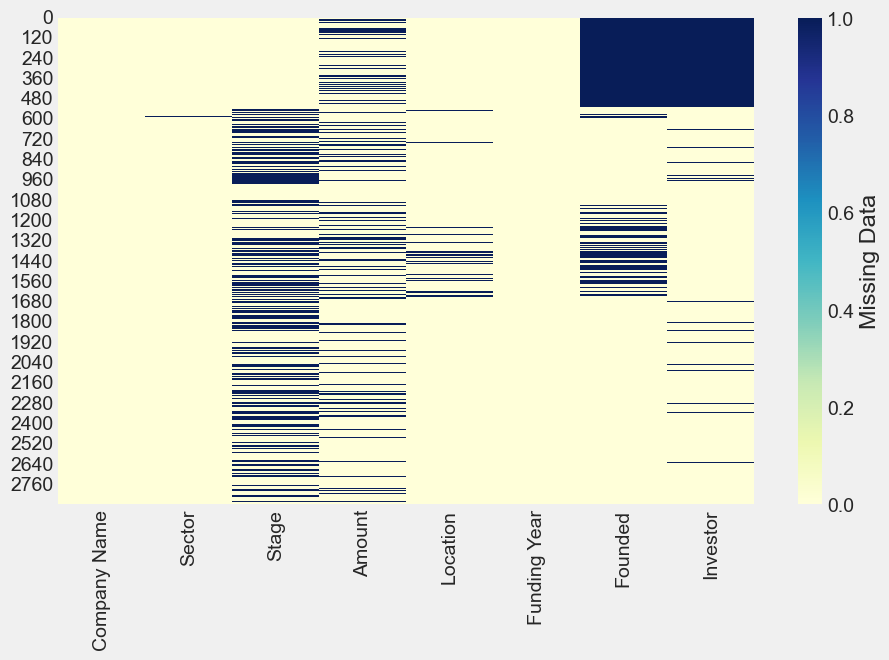

In [128]:
plt.figure(figsize=(10,6))
sns.heatmap(startup_funding_Full.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [129]:
startup_funding_Full.isnull().sum()

Company Name      0
Sector           18
Stage           931
Amount          550
Location        116
Funding Year      0
Founded         768
Investor        638
dtype: int64

In [130]:
# Find the mode of the 'Investor' column
mode = startup_funding_Full['Investor'].mode()[0]

# Replace missing values in the 'Investor' column with the mode
startup_funding_Full['Investor'].fillna(mode, inplace=True)

In [131]:
# Find the mode of the 'Sector' column
mode = startup_funding_Full['Sector'].mode()[0]

# Replace missing values in the 'Sector' column with the mode
startup_funding_Full['Sector'].fillna(mode, inplace=True)

In [132]:
# Find the mode of the 'Location' column
mode = startup_funding_Full['Location'].mode()[0]

## Replace missing values in the 'Location' column with the mode
startup_funding_Full['Location'].fillna(mode, inplace=True)

In [133]:
# Find the mode of the 'Founded' column
mode = startup_funding_Full['Founded'].mode()[0]

# Replace missing values in the 'Founded' column with the mode
startup_funding_Full['Founded'].fillna(mode, inplace=True)

In [134]:
# Find the mode of the 'Stage' column
mode = startup_funding_Full['Stage'].mode()[0]

# Replace missing values in the 'Stage' column with the mode
startup_funding_Full['Stage'].fillna(mode, inplace=True)

Since the 'Amount' column data is skewed and has some has outliers, then replacing the missing values with the mode would be more appropriate as it would be a better representation of the most common value in the data set. 

In [135]:
# Find the mode of the 'Amount' column
#mode = startup_funding_Full['Amount'].mode()[0]

# Replace missing values in the 'Amount' column with the mode
#startup_funding_Full['Amount'].fillna(mode, inplace=True)

In [136]:
# drop the NaN values
startup_funding_Full = startup_funding_Full.dropna()

<Axes: >

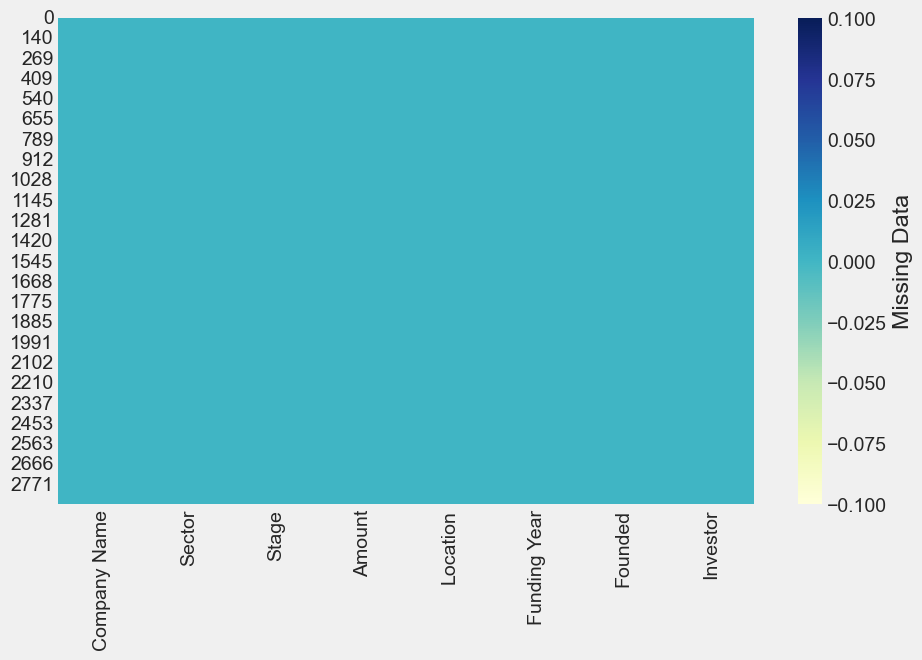

In [137]:
plt.figure(figsize=(10,6))
sns.heatmap(startup_funding_Full.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [138]:
startup_funding_Full.isnull().sum()

Company Name    0
Sector          0
Stage           0
Amount          0
Location        0
Funding Year    0
Founded         0
Investor        0
dtype: int64

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

##### Analysis of the Amount  attribute 

In [139]:
startup_funding_Full['Amount'].head()

0     250000.0
1     480000.0
2     780000.0
3    2000000.0
5    1600000.0
Name: Amount, dtype: float64

In [140]:
# calculate basic statistical measures
mean = startup_funding_Full['Amount'].mean()
median = startup_funding_Full['Amount'].median()
mode = startup_funding_Full['Amount'].mode()
std_dev = startup_funding_Full['Amount'].std()
min_val = startup_funding_Full['Amount'].min()
max_val = startup_funding_Full['Amount'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)


Mean:  120747815.65511408
Median:  3000000.0
Mode:  0    1000000.0
Name: Amount, dtype: float64
Standard Deviation:  3434821861.544426
Minimum Value:  9.6
Maximum Value:  150000000000.0


Since the mean is greater than the mode, it means that the data is positively skewed or right-skewed. This is because in a positively skewed distribution, the mean is pulled towards the tail of the distribution with larger values, while the mode is the most frequently occurring value, which is typically smaller and closer to the center of the distribution. In this case the distribution of data is spread more to the right side

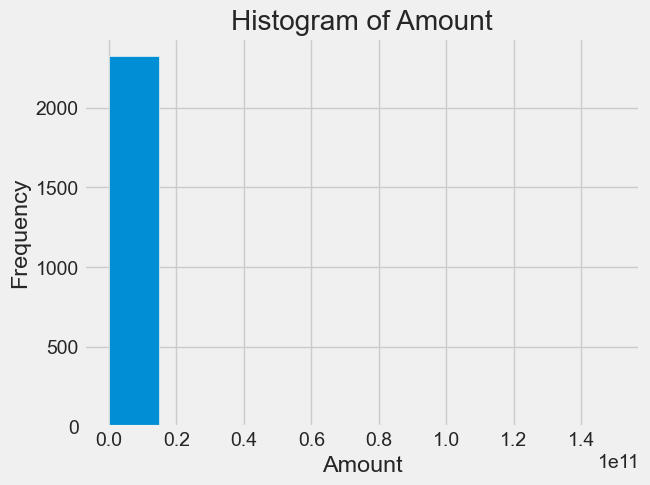

In [141]:
# create a histogram
plt.hist(startup_funding_Full['Amount'])
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')
plt.show()


<Axes: xlabel='Amount'>

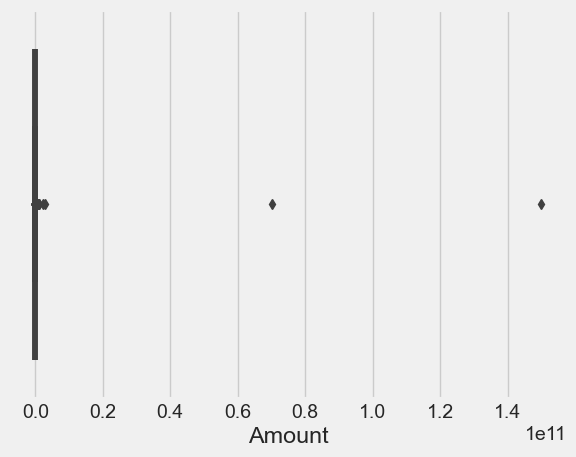

In [142]:
#sns.boxplot(startup_funding_Full['Amount'])
#sns.boxplot(subset['Amount'])

sns.boxplot(data=startup_funding_Full, x='Amount')


<Axes: xlabel='Amount', ylabel='Density'>

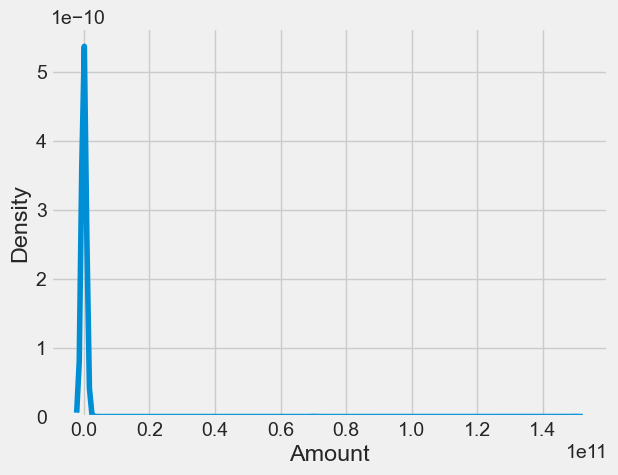

In [143]:
sns.kdeplot(startup_funding_Full['Amount'])

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_33689/1884655393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(startup_funding_Full['Amount'])


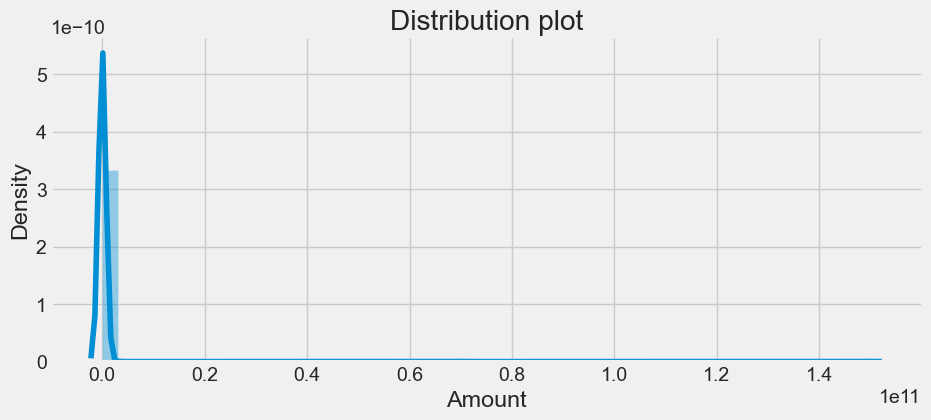

In [144]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(startup_funding_Full['Amount'])
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

Z-scores indicate how many standard deviations an observation is from the mean. Outliers typically have a z-score of greater than 3 or less than -3.

In [145]:

# calculate z-scores
z_scores = stats.zscore(startup_funding_Full['Amount'])


In [146]:
# remove the outliers
#startup_funding_Full = startup_funding_Full.drop(startup_funding_Full.index[outliers])

For positively skewed data, meaning that the tail of the distribution is longer on the right side, the mean will be larger than the median. In this case, it might be more appropriate to use the median to replace outliers, as it is less affected by the presence of outliers in the data.

In [147]:
startup_funding_Full.loc[z_scores > 3, 'Amount'] = startup_funding_Full['Amount'].median()

<Axes: xlabel='Amount'>

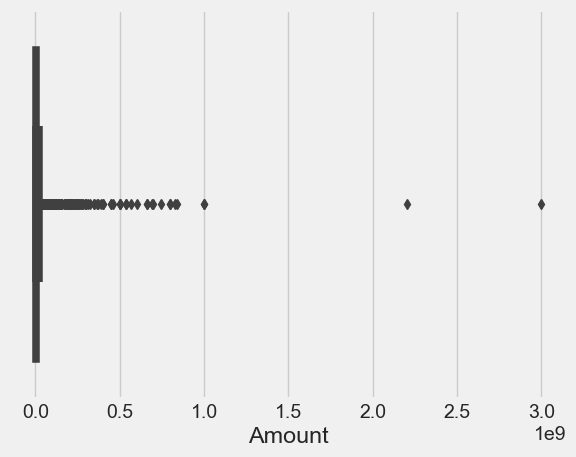

In [148]:
sns.boxplot(data=startup_funding_Full, x='Amount')

##### Analysis of the Founded  attribute 

In [149]:
#startup_funding_Full.dropna(subset=['Founded'], inplace=True)

# calculate basic statistical measures
mean = startup_funding_Full['Founded'].mean()
median = startup_funding_Full['Founded'].median()
mode = startup_funding_Full['Founded'].mode()
std_dev = startup_funding_Full['Founded'].std()
min_val = startup_funding_Full['Founded'].min()
max_val = startup_funding_Full['Founded'].max()

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)
print("Minimum Value: ", min_val)
print("Maximum Value: ", max_val)


Mean:  2016.6452862677572
Median:  2018.0
Mode:  0    2019.0
Name: Founded, dtype: Float64
Standard Deviation:  4.185498316864895
Minimum Value:  1963.0
Maximum Value:  2021.0


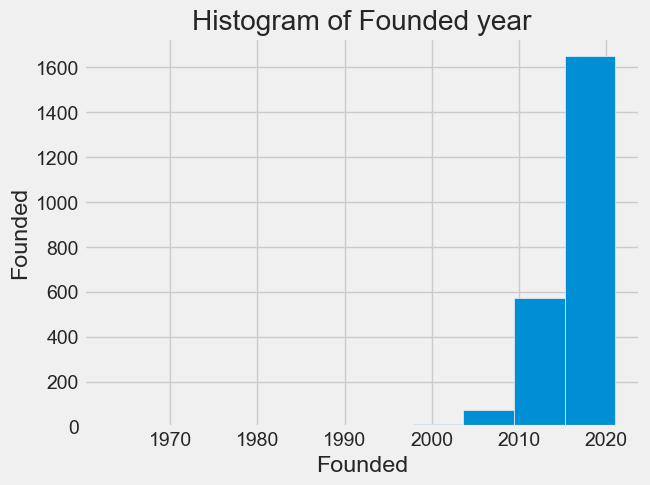

In [150]:
# create a histogram
plt.hist(startup_funding_Full['Founded'])
plt.xlabel('Founded')
plt.ylabel('Founded')
plt.title('Histogram of Founded year')
plt.show()


<Axes: xlabel='Founded'>

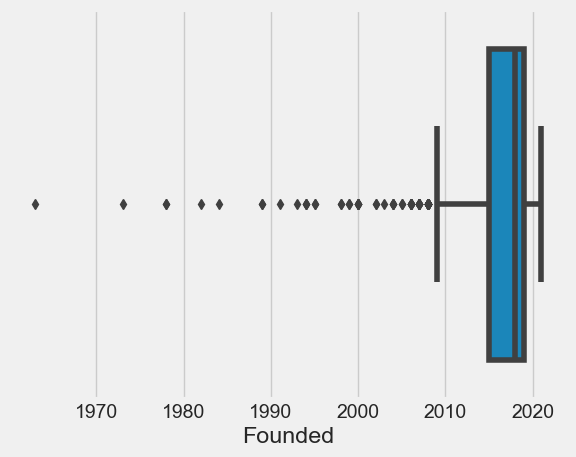

In [151]:
#sns.boxplot(startup_funding_Full['Founded'])
sns.boxplot(data=startup_funding_Full, x='Founded')

/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_33689/4080458865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(startup_funding_Full['Founded'])


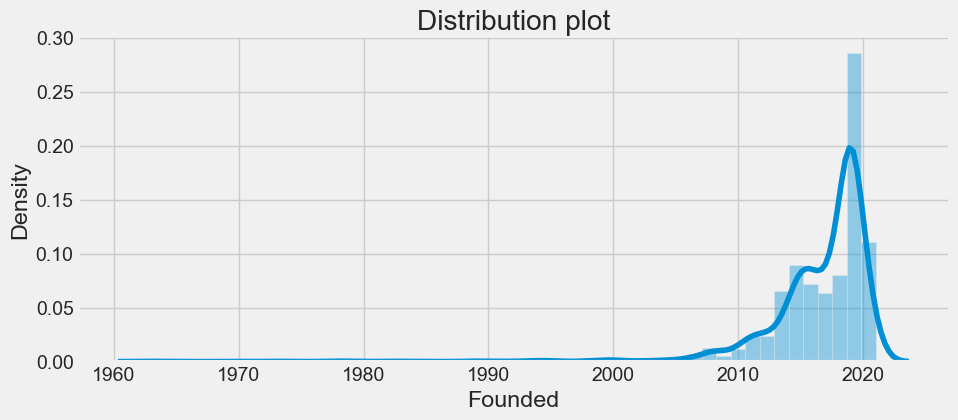

In [152]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(startup_funding_Full['Founded'])
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

##### Analysis of the Stage  attribute 

In [153]:
startup_funding_Full['Stage'].head()

0        Seed
1        Seed
2    Series A
3       Angel
5        Seed
Name: Stage, dtype: object

In [154]:
startup_funding_Full['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Private Equity',
       'Venture - Series Unknown', 'Grant', 'Debt Financing',
       'Post-IPO Debt', 'Series H', 'Series C', 'Series E', 'Pre-Seed',
       '', 'Series D', 'Corporate Round', 'Post-IPO Equity',
       'Secondary Market', 'Non-equity Assistance', 'Funding Round',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Debt', 'Pre-series C', 'Bridge',
       'Series B2', 'Pre-series B', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Round & Series A',
       'Pre Series A', 'Pre series A1', 'Series E2', 'Seed Round',
       'Pre series B', 'Pre series C', 'Angel Round', 'Series D1',
       'Mid series', 'Pre seed round', 'Series C, D', 'Seed Funding',
       'Seed+', 'Series F2', 'Series A+', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Seies A', 'Pre-series

In [155]:
(startup_funding_Full["Stage"].value_counts(normalize=True)*100).head()

Stage
Seed            49.763237
Series A        12.483857
Pre-series A     7.619458
Series B         5.596212
Series C         4.864399
Name: proportion, dtype: float64

In [156]:
(startup_funding_Full["Stage"].value_counts(normalize=True)*100).tail()

Stage
Series A-1    0.043048
Seed A        0.043048
Series B+     0.043048
Edge          0.043048
Series I      0.043048
Name: proportion, dtype: float64

This will create a donut chart that shows the top 5 values of the 'Stage' column, with the size of each section representing the count of occurrences for that stage. The hole in the middle of the donut represents the percentage of the remaining stages that are not shown in the top 5.

In [157]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stage_counts = startup_funding_Full.groupby('Stage')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
top_5_stages = stage_counts.sort_values(by='Amount', ascending=False).head(5)


In [158]:
# Create the donut chart
fig = px.pie(top_5_stages, values='Amount', names='Stage', hole=.4)
fig.show()


In [159]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stage_counts = startup_funding_Full.groupby('Stage')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
low_5_stages = stage_counts.sort_values(by='Amount', ascending=False).tail()
low_5_stages

,Stage,Amount
13,PE,1
14,Post series A,1
23,Pre- series A,1
22,Pre series C,1
42,Seed+,1


In [160]:
# Create the donut chart
fig = px.pie(low_5_stages, values='Amount', names='Stage', hole=.4)
fig.show()

##### Analysis of the Sector attribute 

In [161]:
startup_funding_Full['Sector'].head()

0    brand marketing, event promotion, marketing, s...
1                                 agriculture, farming
2     credit, financial services, lending, marketplace
3                          financial services, fintech
5                     cloud infrastructure, paas, saas
Name: Sector, dtype: object

In [162]:
(startup_funding_Full["Sector"].value_counts(normalize=True)*100).head()

Sector
fintech               10.288420
edtech                 7.404219
financial services     3.013345
e-commerce             2.970297
agritech               2.367628
Name: proportion, dtype: float64

In [163]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Sector_counts = startup_funding_Full.groupby('Sector')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Sector_counts = Sector_counts.sort_values(by='Amount', ascending=False).head(5)


In [164]:

# Create the donut chart
fig = px.pie(Sector_counts, values='Amount', names='Sector', hole=.4)

fig.show()

In [165]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Sector_counts = startup_funding_Full.groupby('Sector')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Sector_counts = Sector_counts.sort_values(by='Amount', ascending=False).tail(5)

# Create the donut chart
fig = px.pie(Sector_counts, values='Amount', names='Sector', hole=.4)

fig.show()


##### Analysis of the Location attribute 

In [166]:
startup_funding_Full['Location'].head()

0    Bangalore
1       Mumbai
2      Gurgaon
3        Noida
5    Bengaluru
Name: Location, dtype: object

In [167]:
(startup_funding_Full["Location"].value_counts(normalize=True)*100).head()

Location
Bangalore    34.954800
Mumbai       16.444253
Gurugram      9.083082
New Delhi     7.963840
Chennai       4.003444
Name: proportion, dtype: float64

In [168]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Location_counts = startup_funding_Full.groupby('Location')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Location_counts = Location_counts.sort_values(by='Amount', ascending=False).head(5)



In [169]:

# Create the donut chart
fig = px.pie(Location_counts, values='Amount', names='Location', hole=.4)

fig.show()

In [170]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Location_counts = startup_funding_Full.groupby('Location')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Location_counts = Location_counts.sort_values(by='Amount', ascending=False).tail(5)



In [171]:

# Create the donut chart
fig = px.pie(Location_counts, values='Amount', names='Location', hole=.4)

fig.show()

##### Analysis of the Investor attribute 

In [172]:
startup_funding_Full['Investor'].head()

0    Inflection Point Ventures
1    Inflection Point Ventures
2    Inflection Point Ventures
3    Inflection Point Ventures
5    Inflection Point Ventures
Name: Investor, dtype: object

In [173]:
(startup_funding_Full["Investor"].value_counts(normalize=True)*100).head()

Investor
Inflection Point Ventures    21.566939
Venture Catalysts             0.602669
Tiger Global                  0.516573
Angel investors               0.473526
Sequoia Capital India         0.387430
Name: proportion, dtype: float64

In [174]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = startup_funding_Full.groupby('Investor')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount', ascending=False).head(5)

# Create the donut chart
fig = px.pie(Investor_counts, values='Amount', names='Investor', hole=.4)

fig.show()


In [175]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = startup_funding_Full.groupby('Investor')['Amount'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount', ascending=False).tail(5)

Investor_counts

,Investor,Amount
535,"IAN Fund, Rajasthan Venture Capital Fund",1
534,"IAN Fund, Malabar Angel Network, Native Angel ...",1
532,IAN,1
531,I2I Capitals,1
1503,velocity.in,1


In [176]:

# Create the donut chart
#Investor_counts['Amount'] = Investor_counts['Amount'] + 

#0.1 is added to make the plot a little significant 
#Because the original values are zeros it was not showing on the figure. 

fig = px.pie(Investor_counts, values='Amount', names='Investor', hole=.4)
fig.show()

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

<Axes: >

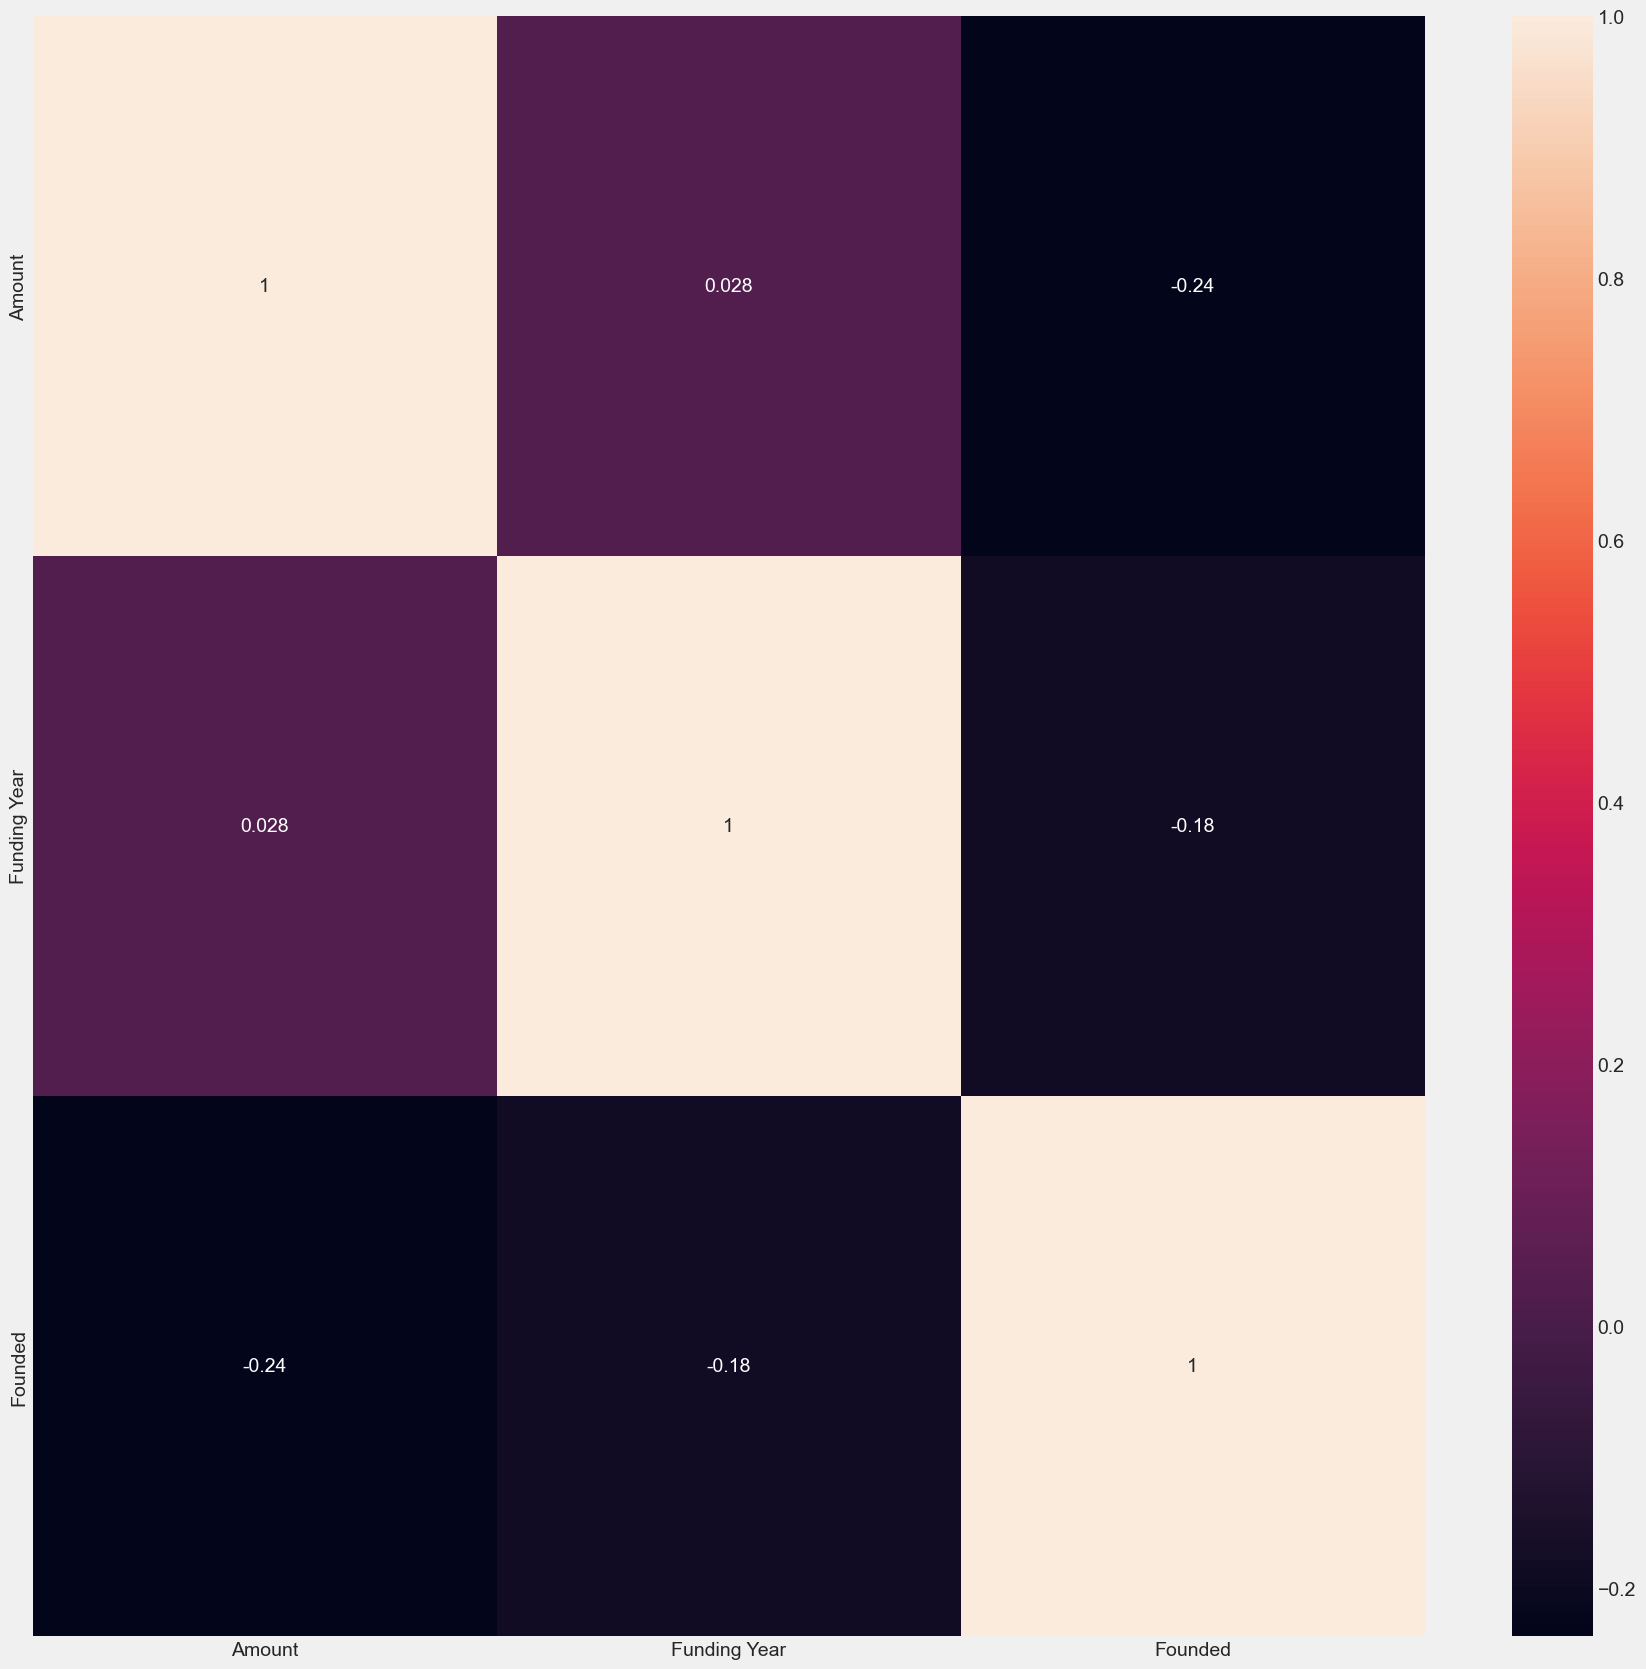

In [179]:
#Check correlation between various attributes in the datatset

numeric_columns = startup_funding_Full.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation, annot=True)


In [181]:

numeric_columns1 = startup_funding_Full.select_dtypes(include=np.number)
correlation = numeric_columns.corr()

corr_matrix=numeric_columns1.corr()

corr_matrix

,Amount,Funding Year,Founded
Amount,1.000000,0.028420,-0.236759
Funding Year,0.028420,1.000000,-0.180689
Founded,-0.236759,-0.180689,1.000000


In [182]:
corr_matrix["Amount"].sort_values(ascending=False)

Amount          1.000000
Funding Year    0.028420
Founded        -0.236759
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Funding Year'>

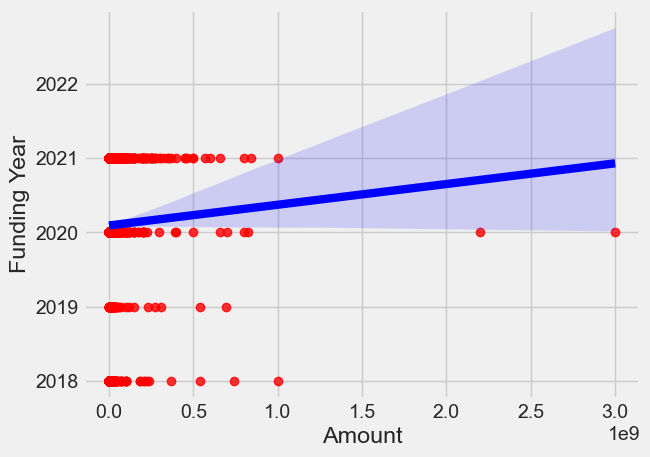

In [183]:
sns.regplot(x='Amount', y='Funding Year', data=startup_funding_Full, scatter_kws={'color':'red'}, line_kws={'color':'blue'})


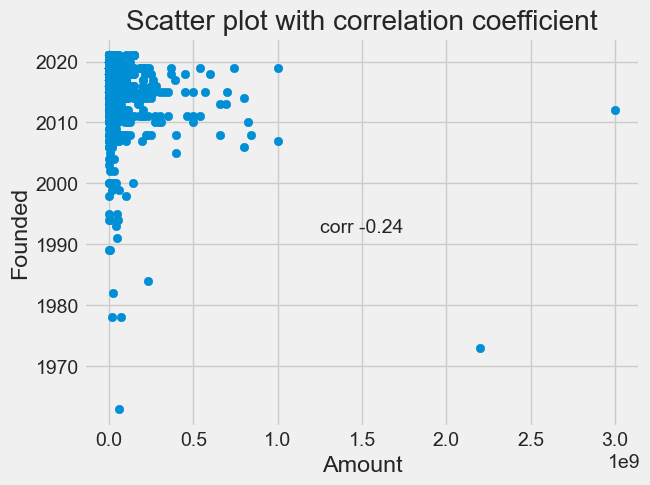

In [184]:
x = startup_funding_Full['Amount']
y = startup_funding_Full['Founded']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Founded')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()


In [185]:
# Create a contingency table
table = pd.crosstab(startup_funding_Full['Sector'], startup_funding_Full['Stage'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(table)

# Print the test statistic and p-value
print("Chi-square test statistic:", chi2)
print("p-value:", p)


Chi-square test statistic: 47746.39057200199
p-value: 1.371677719385724e-35


small p-value (typically less than 0.05) indicates that there is a significant association between the variables and that they are not independent

# Feature processing
In this section we **clean** and **process** the features of the dataset.

In [186]:
# create a new attribute called startup age 
startup_funding_Full["Startup_Age"] = abs(startup_funding_Full["Funding Year"] - startup_funding_Full["Founded"])

In [187]:
# Show the first 4 records 
startup_funding_Full.head()

,Company Name,Sector,Stage,Amount,Location,Funding Year,Founded,Investor,Startup_Age
0,TheCollegeFever,"brand marketing, event promotion, marketing, s...",Seed,250000.0,Bangalore,2018,2019.0,Inflection Point Ventures,1.0
1,Happy Cow Dairy,"agriculture, farming",Seed,480000.0,Mumbai,2018,2019.0,Inflection Point Ventures,1.0
2,MyLoanCare,"credit, financial services, lending, marketplace",Series A,780000.0,Gurgaon,2018,2019.0,Inflection Point Ventures,1.0
3,PayMe India,"financial services, fintech",Angel,2000000.0,Noida,2018,2019.0,Inflection Point Ventures,1.0
5,Hasura,"cloud infrastructure, paas, saas",Seed,1600000.0,Bengaluru,2018,2019.0,Inflection Point Ventures,1.0


/var/folders/sm/rnvnmnr571g7xbm7dtjyqtcw0000gn/T/ipykernel_33689/1690692064.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




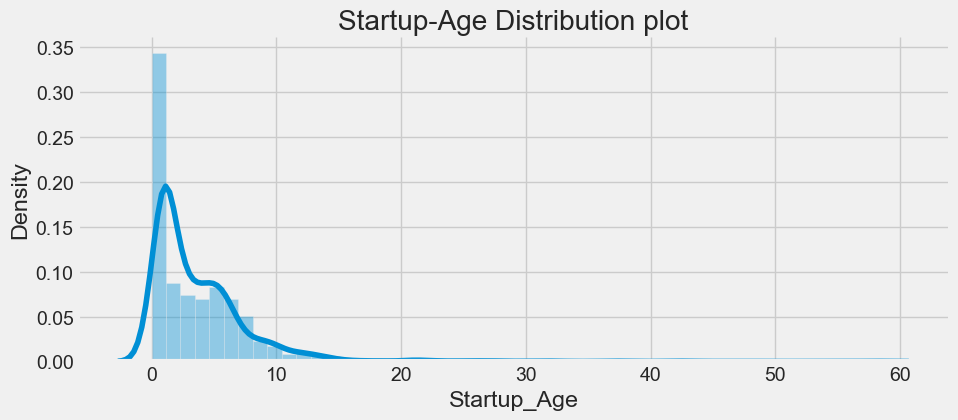

In [188]:
    plt.figure(figsize=(10, 4))
    
    sns.distplot(startup_funding_Full['Startup_Age'])
    plt.title("Startup-Age Distribution plot")
    sns.despine()
    plt.show()

<Axes: xlabel='Startup_Age'>

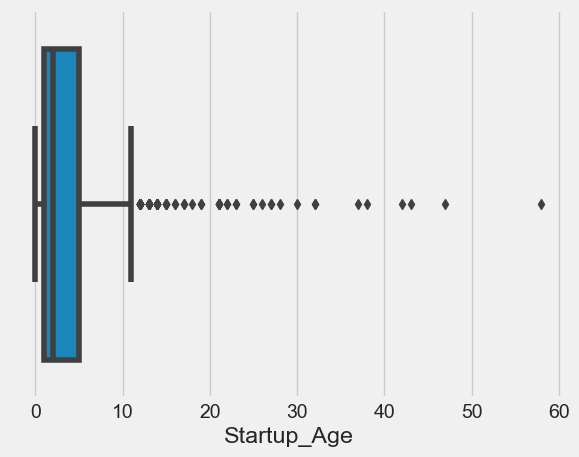

In [189]:
#sns.boxplot(startup_funding_Full['Founded'])
sns.boxplot(data=startup_funding_Full, x='Startup_Age')

<Axes: >

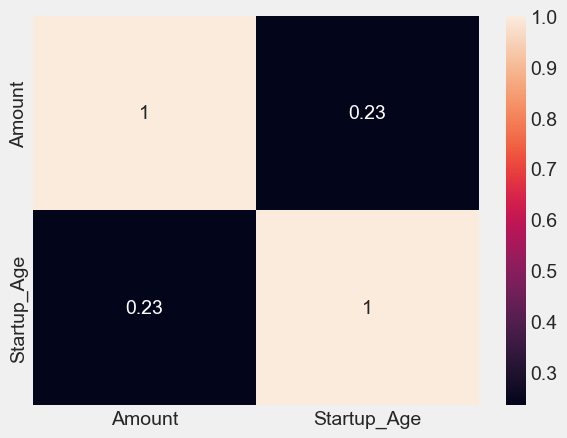

In [190]:
# 

corr = startup_funding_Full[['Amount', 'Startup_Age']].corr()
sns.heatmap(corr, annot=True)


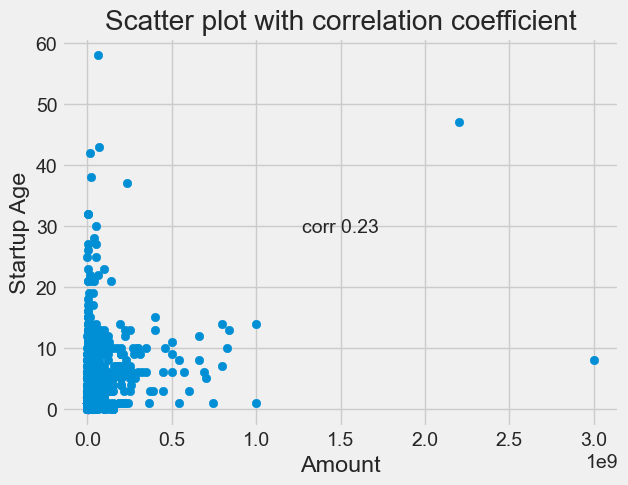

In [191]:
x = startup_funding_Full['Amount']
y = startup_funding_Full['Startup_Age']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount')
plt.ylabel('Startup Age')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()


### ANSWERING THE BUSINESS QUESTIONS

QUESTION 1

Does the age of the  startup affect the funding received?

In [206]:
import plotly.graph_objects as go

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='Viridis'))

# Customize the heatmap
fig.update_layout(
    title="Correlation Matrix Heatmap",
    xaxis_title="Attributes",
    yaxis_title="Attributes"
)

# Display the heatmap
fig.show()


In [192]:
#stage_data = startup_funding_Full.groupby('Stage')['Amount'].sum().reset_index()
#top_10_stages = stage_data.sort_values(by = 'Amount', ascending = False).head(10)
#top_10_stages

top_Startup_Age = startup_funding_Full.groupby("Startup_Age")["Amount"].sum().reset_index()
top_10_Startup_Age = top_Startup_Age.sort_values(by = 'Amount', ascending = False).head(5)
top_10_Startup_Age

,Startup_Age,Amount
1,1.0,9.131238e+09
6,6.0,7.933909e+09
8,8.0,5.217671e+09
5,5.0,5.169014e+09
3,3.0,4.629469e+09


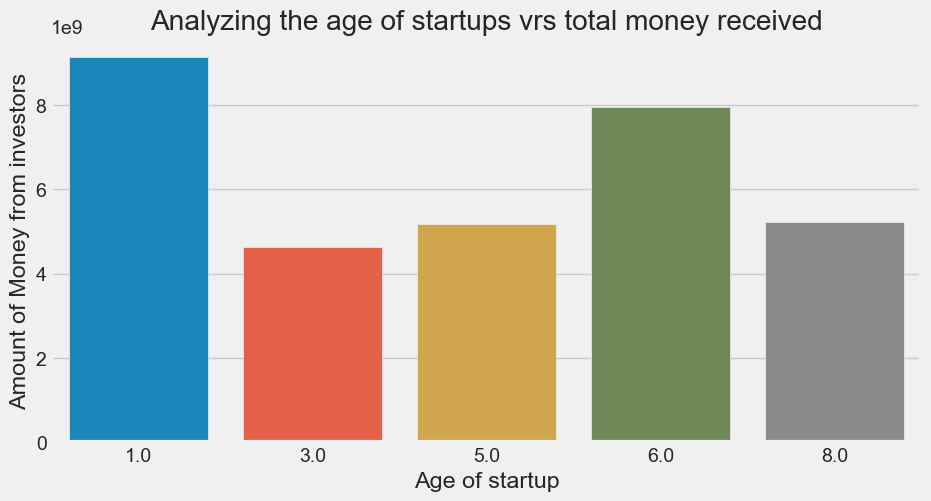

In [193]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Startup_Age', y='Amount', data=top_10_Startup_Age)

# Add labels and title
plt.xlabel("Age of startup")
plt.ylabel("Amount of Money from investors")
plt.title("Analyzing the age of startups vrs total money received")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
#plt.xticks(rotation = 90)

# Show the plot
plt.show()


QUESTION 2

Which sectors received the most funding?

In [207]:
# The code above is trying to analyze the "Sector" column of a DataFrame named "startup_funding_Full" 
#and extract the most common words from it.

# Replace ',' and '&' with '' in the Sector column
sector_analysis = startup_funding_Full['Sector'].apply(lambda x: str(x).replace(',', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('&', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('startup', ''))
sector_analysis = sector_analysis.apply(lambda x: str(x).replace('technology', ''))

# Concatenate all the words in the sector_analysis series into a single string
txt = sector_analysis.str.lower().str.cat(sep=' ')

words = txt.split()

# Create a dictionary to store the word counts
word_counts = {}

# Loop through the list of words and update the count for each word
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
        
# Sort the dictionary by the count and get the top 10 words
top_10 = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10])

print(top_10)


{'fintech': 260, 'edtech': 188, 'services': 174, 'food': 112, 'financial': 111, 'e-commerce': 104, 'information': 80, 'tech': 79, 'health': 78, 'saas': 60}


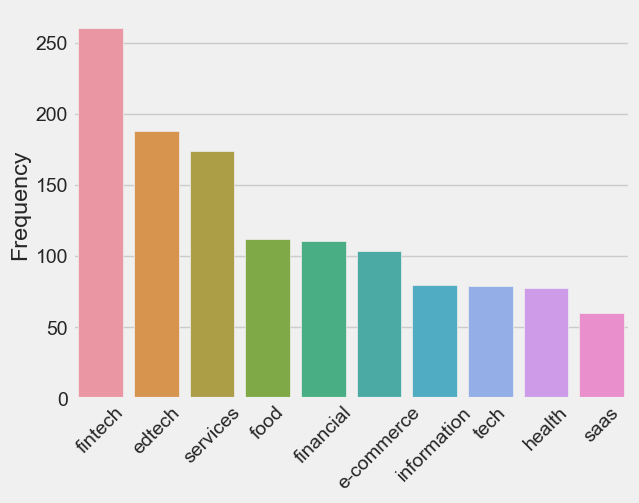

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the top 10 words and their frequencies
top_10_df = pd.DataFrame(top_10.items(), columns=["Word", "Frequency"])

# Use seaborn to create a bar chart
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Word', y='Frequency', data=top_10_df)

# Adjust the plot properties
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [209]:
startup_funding_Full["Sector"] = startup_funding_Full["Sector"].str.lower()
#startup_funding_Full["Sector"].value_counts(normalize=True)*100
#startup_funding_Full['Sector']

In [210]:
startup_funding_Full.Sector = startup_funding_Full.Sector.astype(str)

#the list of keywords were generated from the list of top sectors 
#Tech and Technology were removed because they are too generic 

keywords = ["fintech", "edtech","services", "food","e-commerce", "health"]

keyword_totals = {}

for keyword in keywords:
    
    keyword_totals[keyword] = startup_funding_Full[startup_funding_Full['Sector'].apply(lambda x: keyword in x)].Amount.sum()
    
# keyword_totals is a dictionary that store the sum of amounts for a corresponding keyword


In [211]:
keyword_totals

{'fintech': 5086673509.6,
 'edtech': 5946149730.0,
 'services': 3718164200.0,
 'food': 4231877300.0,
 'e-commerce': 3361212000.0,
 'health': 2829874145.0}

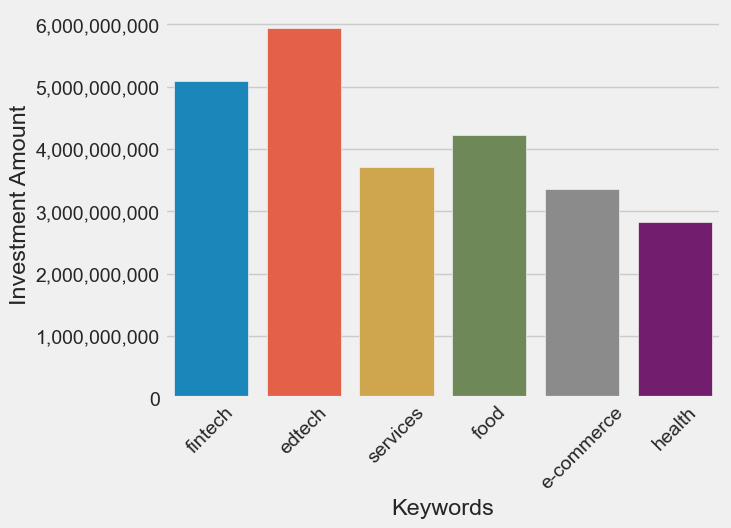

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create a DataFrame with the keyword totals
keyword_totals_df = pd.DataFrame.from_dict(keyword_totals, orient='index', columns=['Amount'])

# Use seaborn to create a bar chart
ax=sns.barplot(x=keyword_totals_df.index, y='Amount', data=keyword_totals_df)

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Adjust the plot properties
plt.xlabel("Keywords")
plt.ylabel("Investment Amount")
plt.xticks(rotation = 45)

# Show the plot
plt.show()


QUESTION 3

Can location affect the success of receiving funding from investors?

In [214]:
index_new = startup_funding_Full.index[startup_funding_Full['Location']=='California']
#index_new
Location_data = startup_funding_Full.drop(labels=index_new, axis=0)

In [215]:
Location_grp = Location_data.groupby('Location')['Amount'].sum().reset_index()
top_10_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(10)
top_5_locations = Location_grp.sort_values(by = 'Amount', ascending = False).head(5)
top_10_locations

,Location,Amount
7,Bangalore,2.621025e+10
58,Mumbai,1.147293e+10
34,Gurugram,5.597175e+09
61,New Delhi,3.383811e+09
71,Pune,1.394010e+09
33,Gurgaon,1.374773e+09
19,Chennai,1.123558e+09
35,Haryana,8.653938e+08
23,Delhi,8.257802e+08
63,Noida,5.860570e+08


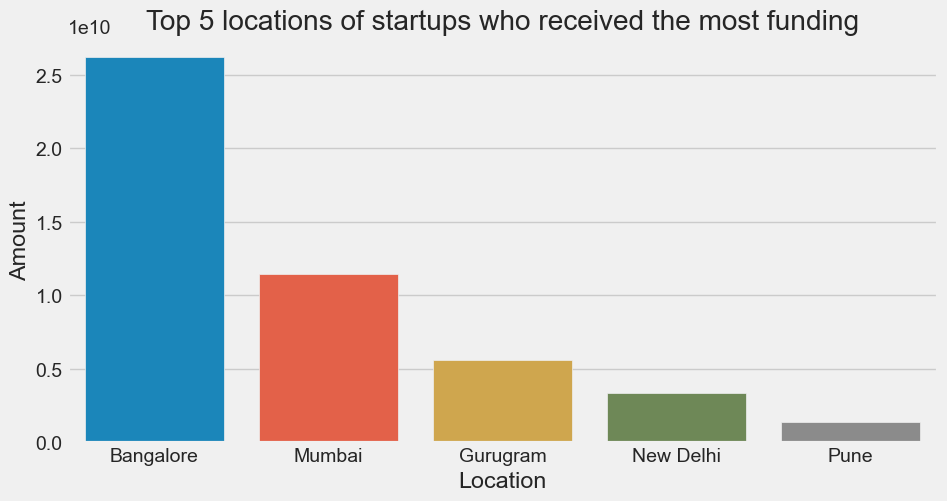

In [244]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Location', y='Amount', data=top_5_locations)

# Add labels and title
plt.xlabel("Location")
plt.ylabel("Amount")
plt.title("Top 5 locations of startups who received the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Show the plot
plt.show()


QUESTION 4

At what stage do startups receive the most funding?

In [217]:
stage_data = startup_funding_Full.groupby('Stage')['Amount'].sum().reset_index()
top_5_stages = stage_data.sort_values(by = 'Amount', ascending = False).head()
top_5_stages

,Stage,Amount
34,Seed,3.145554e+10
52,Series C,5.523411e+09
48,Series B,3.719507e+09
54,Series D,3.522725e+09
56,Series E,3.440833e+09


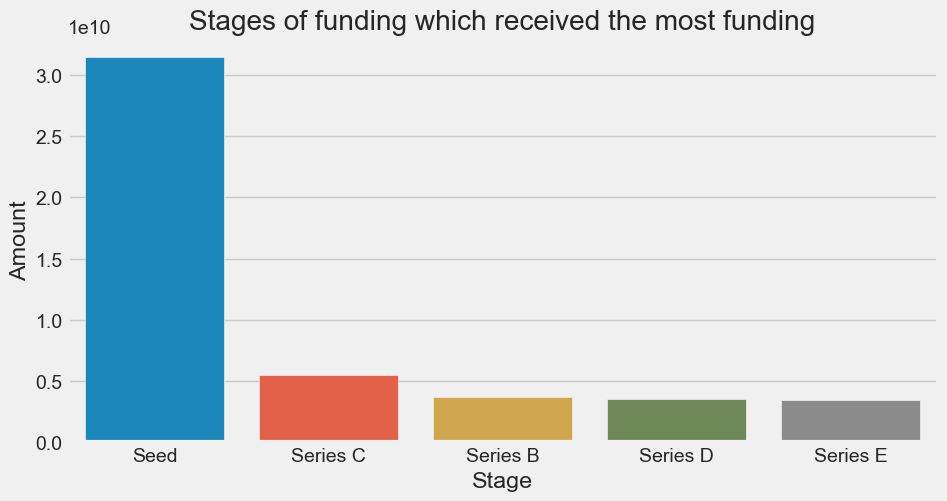

In [221]:
#Visualizing the results of the top 5 stages 

fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Stage', y='Amount', data=top_5_stages)

# Add labels and title
plt.xlabel("Stage")
plt.ylabel("Amount")
plt.title("Stages of funding which received the most funding")

# format y-axis labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


# Show the plot
plt.show()


QUESTION 5

What is the average amount received each year

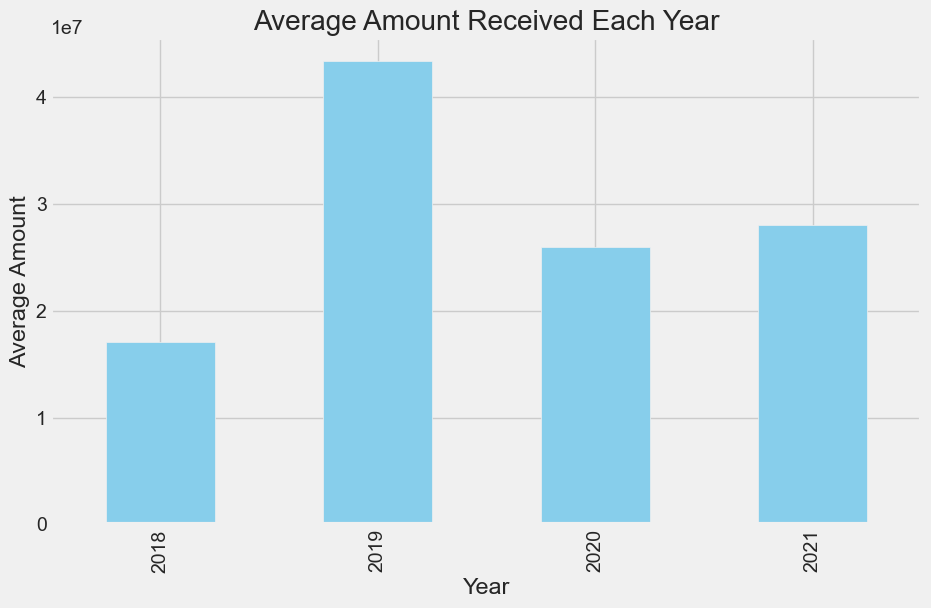

In [233]:

# Group the data by year and stage, and calculate the average amount
average_amount_per_year = startup_funding_Full.groupby('Funding Year')['Amount'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_amount_per_year.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Average Amount')
plt.title('Average Amount Received Each Year')

# Display the plot
plt.show()




## Hypothesis: 

##### NULL: Technological industries do not have a higher success rate of being funded 

##### ALTERNATE: Technological industries have a higher success rate of being funded


Since our hypothesis focuses on two groups i.e Technological and Non-Technological. We decided to create a list which contains keywords associated with techology like Fintech, edtech, robotics etc. This is generated manually by skimming through the sector attribute of the full datatset 

In [234]:

# Define the keywords
keywords = ["fintech", "edtech", "e-commerce","robotics", "cryptocurrency", "esports",
            "automotive ", "engineering ","telecommunications", "electricity", 
            "agritech", "healthtech", "technology", "e-marketplace", "social", 
            "tech", "gaming", "computer", "femtech", "solar", "embedded ", 
            "software ", "saas ", "e-commerce", "analytics", "ar", "vr", "crm", "nft", 
            "e-learning", "iot", "e-commerce", "e-mobility", "api ", 
            "ecommerce", "media", "ai","sportstech", "traveltech", "online", 
            "information", "automobile", "e-commerce", "biotechnology", "applications",  
            "it", "edtech", "energy", "computer", "agritech", "online ", "virtual ", 
            "fintech", "internet", "automation", "cloud", "apps", "chatbot", 
            "digital", "cleantech", "ev", "manufacturing","networking", "mobile ", 
            "electronics", "logitech", "solar", "insurtech","finance", "electric", 
            "fmcg", "intelligence", "blockchain","crypto", "foodtech ", "audio ", 
            "nanotechnology", "biometrics", "auto-tech", "biotech", "data ",  "autonomous ", 
            "AI", "machine learning", "e-market", "proptech", "machine learning "]


In [235]:
def check_keywords(string, keywords):
    for keyword in keywords:
        if keyword in string:
            return "technology"
    return "non-technology"

In [236]:
# Select only the rows with non-null values in the Sector column
startup_funding_Full = startup_funding_Full[startup_funding_Full["Sector"].notnull()]

# Convert the Sector column to a Pandas Series
sector_series = pd.Series(startup_funding_Full["Sector"])

#startup_funding_Full["Sector"].str.apply(check_keywords, keywords=keywords)

# Apply the check_keywords function to the Series
sector_series = sector_series.apply(check_keywords, keywords=keywords)

# Convert the resulting Series back to a column in the startup_funding_Full DataFrame
startup_funding_Full["label"] = sector_series


In [237]:
#Count the occurance of each unique term in the label column 

startup_funding_Full["label"].value_counts(normalize=True)*100

label
technology        77.959535
non-technology    22.040465
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1251b5390>,
 [Text(-0.8466725831290485, 0.7022432178224187, 'Technology '),
  Text(0.8466726488777996, -0.7022431385512075, 'Non-technology ')],
 [Text(-0.4618214089794809, 0.3830417551758647, '78.0%'),
  Text(0.4618214448424361, -0.3830417119370222, '22.0%')])

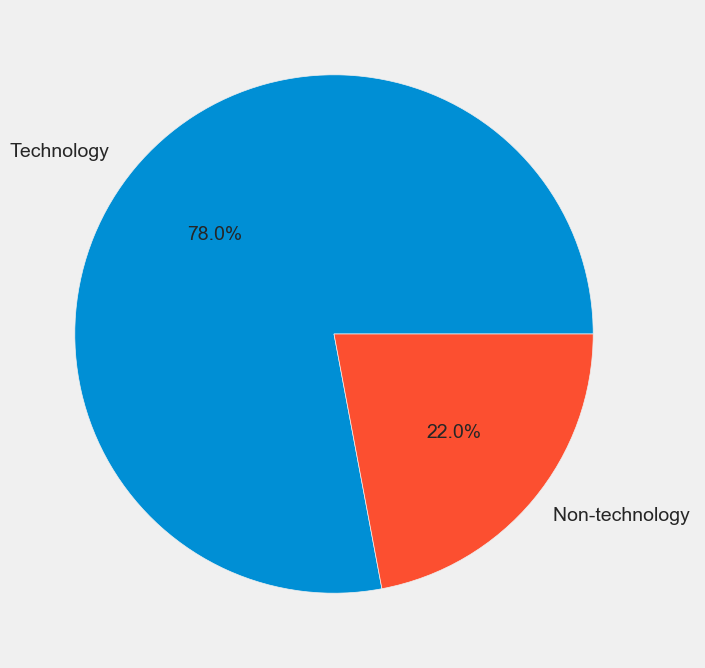

In [238]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['Technology ', 'Non-technology ']
label_data = startup_funding_Full["label"].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

The t-test statistic is a measure of the difference between the means of the two groups, and the p-value is the probability that the difference between the means is due to chance. A small p-value (typically less than 0.05) indicates that the difference between the means is statistically significant, and that it is unlikely that the difference is due to chance.

In [239]:
from scipy import stats

# Extract the funding amounts for the tech and non-tech groups
tech_amounts = startup_funding_Full[startup_funding_Full['label'] == 'technology']['Amount']
non_tech_amounts = startup_funding_Full[startup_funding_Full['label'] == 'non-technology']['Amount']

# Perform the t-test
t_test_result = stats.ttest_ind(tech_amounts, non_tech_amounts)

# Print the test statistic and p-value
print("T-test statistic: ", t_test_result.statistic)
print("P-value: ", t_test_result.pvalue)


T-test statistic:  -2.3003530123438907
P-value:  0.021516530805461336



You will have to interpret the result of the test based on the p-value, if the p-value is less than 0.05 then you reject the null hypothesis (which states that there is no difference between the means of the two groups) and accept the alternative hypothesis (which states that there is a difference between the means of the two groups).

In [240]:
from scipy.stats import mannwhitneyu

# Extract the funding amounts for the tech and non-tech groups
tech_amounts = startup_funding_Full[startup_funding_Full['label'] == 'technology']['Amount']
non_tech_amounts = startup_funding_Full[startup_funding_Full['label'] == 'non-technology']['Amount']

# Perform the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(tech_amounts, non_tech_amounts)

# Print the test statistic and p-value
print("U-statistic: ", u_statistic)
print("P-value: ", p_value)


U-statistic:  446115.5
P-value:  0.19141151304402104


If the p-value is less than the significance level, you can reject the null hypothesis that there is no difference in funding between the two groups, and conclude that there is a significant difference.

In [241]:
# Set the float format to a custom function that formats the number as a string without the exponential notation

pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

group_obj = startup_funding_Full["Amount"].groupby(startup_funding_Full["label"]).agg(['max','mean', 'sum'])

group_obj

,max,mean,sum
label,,,
non-technology,2200000000,35760769,18309513570
technology,3000000000,23298543,42193662197


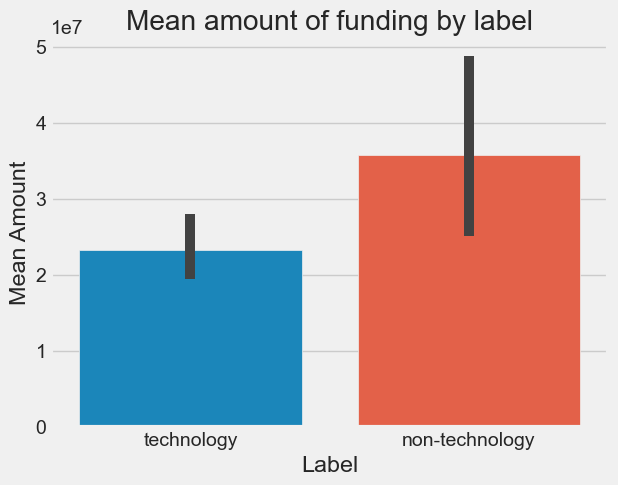

In [242]:

# Create a bar chart of the mean 'Amount' grouped by 'label'
sns.barplot(x='label', y='Amount', data=startup_funding_Full, estimator=np.mean)

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Mean Amount")
plt.title("Mean amount of funding by label")

# Show the plot
plt.show()


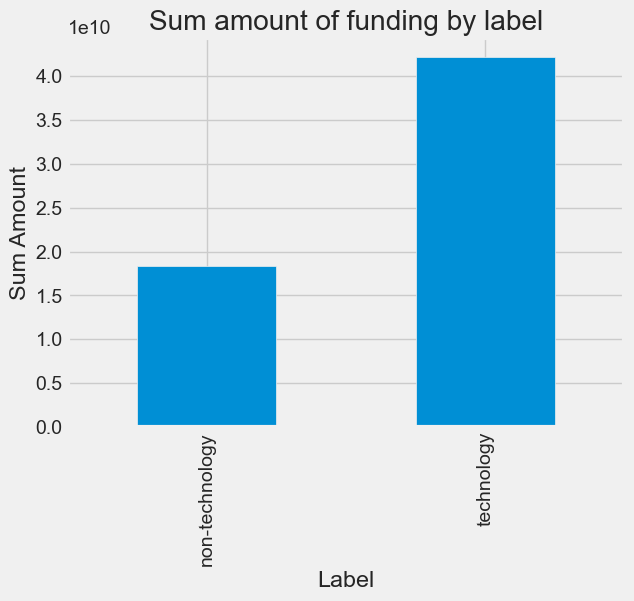

In [243]:
sum_value = startup_funding_Full["Amount"].groupby(startup_funding_Full["label"]).sum().plot.bar()

# Add labels and title
plt.xlabel("Label")
plt.ylabel("Sum Amount")
plt.title("Sum amount of funding by label")

# Show the plot
plt.show()

Before concluding, it would be prudent to perform a few checks to determine if there may be any ambiguity at play.

In [ ]:
# set threshold as the average amount
threshold = startup_funding_Full['Amount'].mean()

# create a new column 'above_threshold' that indicates whether the amount is above the threshold
startup_funding_Full['above_threshold'] = startup_funding_Full['Amount'] > threshold

# group by label and above_threshold and count the number of companies
counts = startup_funding_Full.groupby(['label', 'above_threshold']).size().reset_index(name='counts')

# group by label and above_threshold and find the sum and mean of the amount column
sums = startup_funding_Full.groupby(['label', 'above_threshold'])['Amount'].sum().reset_index(name='sums')
means = startup_funding_Full.groupby(['label', 'above_threshold'])['Amount'].mean().reset_index(name='means')

counts

,label,above_threshold,counts
0,non-technology,False,173
1,non-technology,True,66
2,technology,False,634
3,technology,True,170


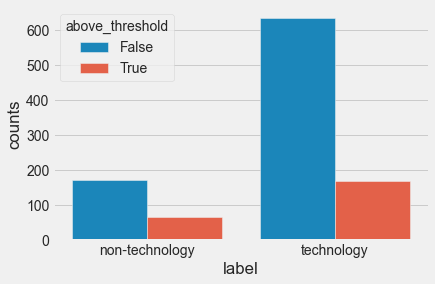

In [ ]:
sns.barplot(x='label', y='counts', hue='above_threshold', data=counts)
plt.show()

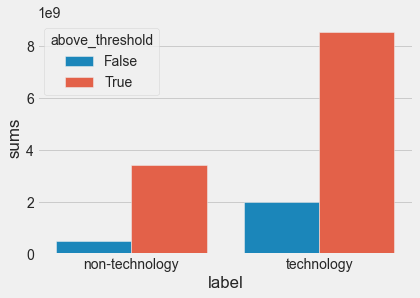

In [ ]:
sns.barplot(x='label', y='sums', hue='above_threshold', data=sums)
plt.show()

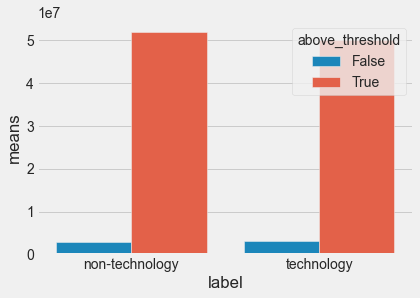

In [ ]:
sns.barplot(x='label', y='means', hue='above_threshold', data=means)
plt.show()

ALTERNATE: Technological industries have a higher success rate of being funded is true.

# MAJOR TAKEAWAYS

## 1. Large amounts of investments are being pumped into the Indian Startup Ecosystem
## 2. Fintech and edtech are favourites to receive funding in the Indian ecosystem
## 3. Bangalore is the place to be as startups from this region received the most funding.